In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import gzip, cPickle

from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa as tsa 
from statsmodels.tsa.stattools import coint

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller as ADF
from sklearn.decomposition import PCA

from itertools import combinations
from tqdm import tqdm
import pickle
from datetime import datetime as dt

C:\Users\Juntao\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## This step is to download and load all the ETF data

In [ ]:
with gzip.open('etf_data.pkl.gz', 'r') as f:
    etf_data = cPickle.load(f)

In [ ]:
print etf_data.items

In [ ]:
etf_adj_close = etf_data['Adj Close']

In [ ]:
etf_adj_close.head(10)

In [ ]:
etf_adj_close.describe()

## Load S&P 500 data

In [ ]:
with gzip.open('all_data.pkl.gz', 'r') as f:
    stock_data = cPickle.load(f)

stock_adj_close = stock_data['Adj Close']

GSPC = stock_adj_close['^GSPC']

GSPC.name = 'GSPC'

In [ ]:
GSPC.head(10)

In [ ]:
GSPC.describe()

In [ ]:
etf_adj_close['GSPC'] = GSPC

In [ ]:
etf_adj_close.describe()

In [ ]:
for i in etf_adj_close.columns:

    etf_adj_close[[i]].plot(figsize=(10,5))

    plt.show()


In [ ]:
etf_adj_close_log = etf_adj_close.apply(np.log)

In [ ]:
etf_adj_close_log.head()

In [ ]:
etf_adj_close.head()

In [ ]:
etf_adj_close_log.head()

In [ ]:
for i in etf_adj_close_log.columns:

    name = i+'_adj_closed_log'

    print(name)

    globals()[name] = etf_adj_close_log[[i]]
 

In [ ]:
XLF_adj_closed_log.columns[0]

In [ ]:
plt.plot(XLF_adj_closed_log.index, XLF_adj_closed_log.values)
plt.plot(GSPC_adj_closed_log.index, GSPC_adj_closed_log.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([XLF_adj_closed_log.columns[0], GSPC_adj_closed_log.columns[0]])
plt.show()

##  let's do the stationary test for log price of every ETF and GSPC in the dataframe 

In [ ]:
j = 0
for i in etf_adj_close_log.columns:
    etf = etf_adj_close_log[[i]].dropna(axis=0,how = 'any')
    pvalue = ADF(etf.values.flatten())[1]
    if pvalue < 0.01:
        print("original %s is stationary, cause pvalues is %s less than 0.01" % (i, pvalue))
    else:
        etf = etf.diff(1).dropna() 
        pvalue = ADF(etf.values.flatten())[1]
        if pvalue < 0.01:
            j+=1
            print("%s is stationary in first difference , cause pvalues is %s less than 0.01" % (i, pvalue))
        else:
            print("%s is not stationary in first difference, and the p-value is %s" %(i,pvalue))


print('\n')            
print("total number of assests is %s"%(etf_adj_close_log.shape[1]))
print('\n')
print ("total number of Integration of order 1 is %s"%(j))

## From above, we can see every asset is integrated of order 1

In [ ]:
a

In [ ]:
a[:-1]

In [ ]:
%%time
m = 0
n = 0
for i in combinations(range(21), 16):
    n+=1
    columns = list(i)
    columns.append(-1)
    #GSPC_adj_closed_log
    R_M = LinearRegression()
    data = etf_adj_close_log.iloc[:,columns].dropna(axis=0,how = 'any')
    X_part = data.iloc[:,:-1]
    Y = data.iloc[:,-1]
    R_M.fit(X_part,Y) 
    residual = Y - R_M.predict(X_part) 
    if (check_for_stationarity_no_print(residual.values.flatten()) and  sum(R_M.coef_ < 0) <=5 ):
        m+=1
        print (columns)
        #print (data.head(10))
    
#     if n == 1000:
#         break

# X_part_constant = sm.add_constant(X_part)

# sm_ols_results = sm.OLS(Y, X_part_constant).fit()

# print(sm_ols_results.params)

# print(sm_ols_results.summary())    

In [ ]:
m

In [ ]:
n

In [ ]:
sum(R_M.coef_ < 0) <=5

In [ ]:
columns = [ 2,7, 8, 12, 15, 19,  -1]

In [ ]:
data = etf_adj_close_log.iloc[:,columns].dropna(axis=0,how = 'any')
X_part = data.iloc[:,:-1]
Y = data.iloc[:,-1]
R_M.fit(X_part,Y) 
residual = Y - R_M.predict(X_part) 


In [ ]:
if (check_for_stationarity_no_print(residual.values.flatten()) and  sum(R_M.coef_ < 0) <=5 ):
    print (columns)
 

In [ ]:
data.head()

In [ ]:
X_part_constant = sm.add_constant(X_part)

sm_ols_results = sm.OLS(Y, X_part_constant).fit()

print(sm_ols_results.params)

print(sm_ols_results.summary())    

In [ ]:
(list(combinations(range(21), 16)))

In [ ]:
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = ADF(X)[1]
    if pvalue < cutoff:
        print 'p-value = ' + str(pvalue) + ' The series '  +' is likely stationary.'
        return True
    else:
        print 'p-value = ' + str(pvalue) + ' The series '+' is likely non-stationary.'
        return False

In [ ]:
def check_for_stationarity_no_print(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = ADF(X)[1]
    if pvalue < cutoff:
        #print 'p-value = ' + str(pvalue) + ' The series '  +' is likely stationary.'
        return True
    else:
        #print 'p-value = ' + str(pvalue) + ' The series '+' is likely non-stationary.'
        return False

In [ ]:
 for i in etf_adj_close_log.columns:
    etf = etf_adj_close_log[[i]].dropna(axis=0,how = 'any')
    if check_for_stationarity_no_print(etf.values.flatten()):
        print "great"

# Load useful ETFs dataset


In [3]:
tickers = '''XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,IYF,FTXO,RYF,XLY,VCR,IYC,XRT,RCD,JHMC,RXI,XLV,IBB,VHT,\n
IYH,RYH,PSCH,XLI,VIS,IYJ,RGI,PSCI,XLE,VDE,IYE,RYE,FXN,XLP,VDC,IYK,RHS,PSCC,FXG,XLB,VAW,IYM,RTM,XME,PSCM,\n
VOX,IXP,IYZ,XTL,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT'''.replace('\n', '').split(',')

In [7]:
%%time
X = pd.DataFrame()
start_date = '2008-01-01'
end_date = '2018-01-31'
data_source = 'yahoo'
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
for i in tickers:
    print i
    etf_data= web.DataReader(i, data_source, start_date, end_date)
    new_col = etf_data[['Adj Close']]
    new_col.columns = [i]
    X =  pd.concat([X, new_col], axis=1)

    
X_log = X.apply(np.log)

XLK
VGT
IYW
RYT
IGM
XNTK
PNQI
XLF
VFH
KBE
IYF
FTXO
RYF
XLY
VCR
IYC
XRT
RCD
JHMC
RXI
XLV
IBB
VHT
IYH
RYH
PSCH
XLI
VIS
IYJ
RGI
PSCI
XLE
VDE
IYE
RYE
FXN
XLP
VDC
IYK
RHS
PSCC
FXG
XLB
VAW
IYM
RTM
XME
PSCM
VOX
IXP
IYZ
XTL
XLU
VPU
IDU
RYU
PUI
VNQ
IYR
RWR
REM
USRT
Wall time: 1min 24s


In [8]:
X.describe()

,XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,...,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2426.000000,2539.000000,2539.000000,2539.000000,...,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,31.033891,78.453770,79.580924,67.526666,79.506773,39.649748,54.114116,12.191615,37.399142,27.467912,...,33.068583,71.792485,83.055987,53.631753,17.270943,54.955805,53.069948,62.202999,11.302242,35.553237
std,12.873570,33.615734,32.280497,30.125554,34.649616,16.656107,27.684691,5.485809,12.831701,8.329898,...,10.090868,22.655300,25.648892,17.853500,5.337037,18.516407,16.554852,20.678466,11.399748,8.746054
min,11.232627,26.422161,27.657465,21.362898,26.796688,13.219791,10.342249,3.248616,11.427440,8.020460,...,15.998307,33.620232,38.856316,22.919846,8.691051,14.731371,15.262321,16.558020,3.651316,12.073025
25%,20.393621,51.026533,53.721485,44.027443,51.729323,26.880414,33.347125,8.078525,26.765634,20.670477,...,24.538982,53.324600,62.179296,38.672664,13.027029,40.876322,41.247883,47.042633,6.206017,30.365754
50%,27.401344,67.765488,69.821785,55.404766,67.321465,33.607441,45.439407,11.274132,36.700890,27.721994,...,30.505804,65.844437,76.199463,50.212456,15.402087,54.629917,52.701633,61.355957,7.478841,35.682888
75%,40.124239,102.304467,101.938072,88.396828,102.833638,49.783630,73.382893,14.055587,45.912468,32.146971,...,40.305985,87.753300,101.399803,67.672875,20.751143,71.261330,67.277321,81.350853,8.472324,42.151798
max,68.974213,178.819473,176.210236,156.476532,185.877365,93.399139,131.339996,30.060575,74.873703,50.999210,...,55.910404,122.984840,140.489136,89.373810,29.459372,86.875267,81.375084,97.824753,45.119091,50.352188


In [11]:
X.head()

,XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,...,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,22.098740,53.268589,56.017902,45.235744,54.408684,27.862883,NaN,14.305944,41.652599,35.166389,...,28.566296,59.947933,71.388649,41.737343,14.337612,40.162682,42.196808,47.435150,8.983622,34.976913
2008-01-03,22.132580,52.997772,55.789246,44.755886,54.259819,27.940943,NaN,14.215148,41.288517,35.025986,...,28.525572,60.058559,71.592514,41.917027,14.271438,38.910671,40.830173,46.044064,8.910232,33.672215
2008-01-04,21.269606,50.750046,53.393055,42.910275,51.757092,26.646067,NaN,13.811594,40.147667,33.836712,...,28.742760,59.899540,71.543304,41.633671,14.278792,37.330921,39.534801,44.102032,8.794044,32.376438
2008-01-07,21.083485,50.280647,52.890045,42.310459,51.347736,26.297098,NaN,13.846903,40.333759,34.150543,...,29.340000,60.985104,72.815964,42.158928,14.558186,37.678326,39.903980,44.398148,8.888833,32.447933
2008-01-08,20.525089,48.737019,51.298668,41.396889,49.868423,25.723120,NaN,13.342463,38.836933,32.705246,...,29.346796,60.950520,72.717522,42.158928,14.455253,36.373859,38.453159,42.951958,8.757350,31.482798


In [15]:
pickle.dump(ETFs_GSPC, open("ETFs_GSPC_MRP_Production.p", "w"))

In [13]:
ETFs_GSPC = pd.concat((X,GSPC), axis=1)

In [14]:
ETFs_GSPC.shape

(2539, 63)

In [9]:
GSPC = web.DataReader("^GSPC", "yahoo",start_date,end_date)
GSPC = GSPC[['Adj Close']]

In [10]:
GSPC.head()

,Adj Close
Date,
2008-01-02,1447.160034
2008-01-03,1447.160034
2008-01-04,1411.630005
2008-01-07,1416.180054
2008-01-08,1390.189941


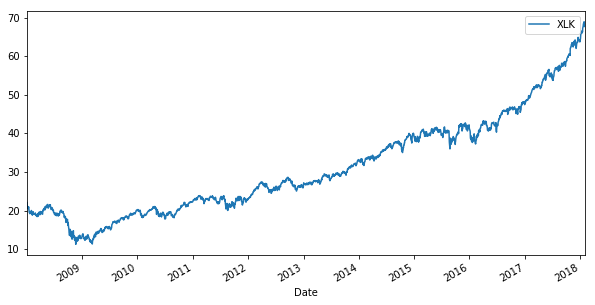

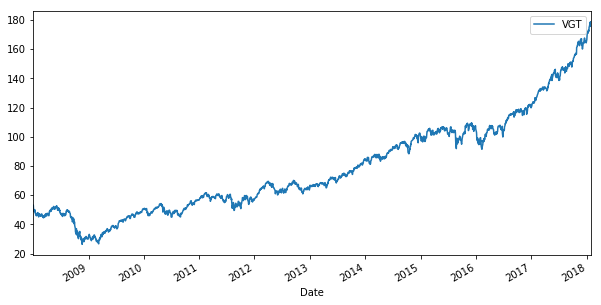

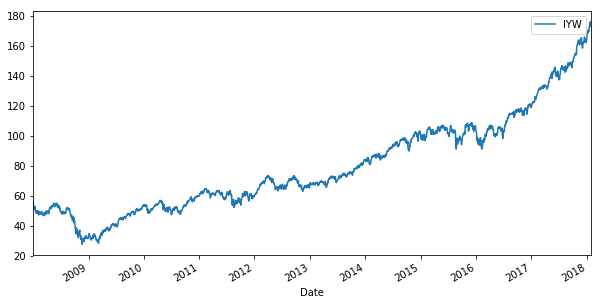

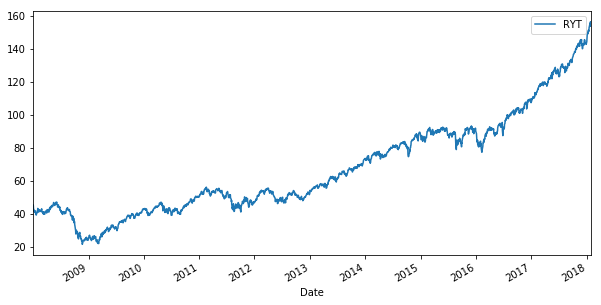

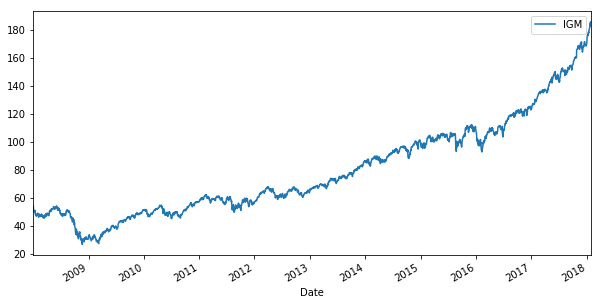

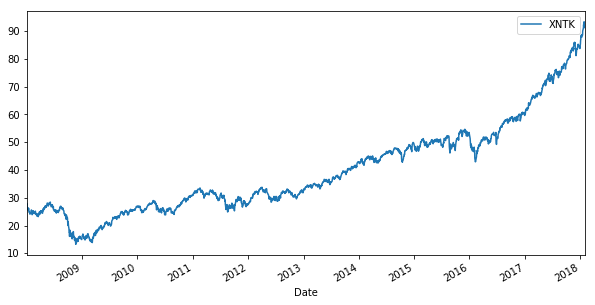

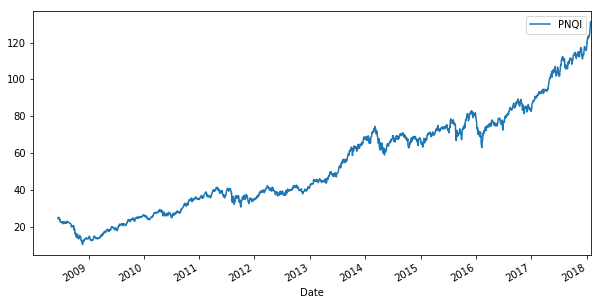

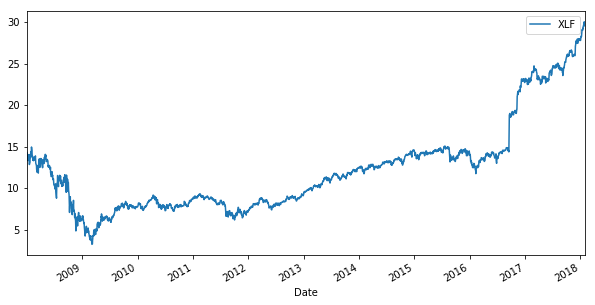

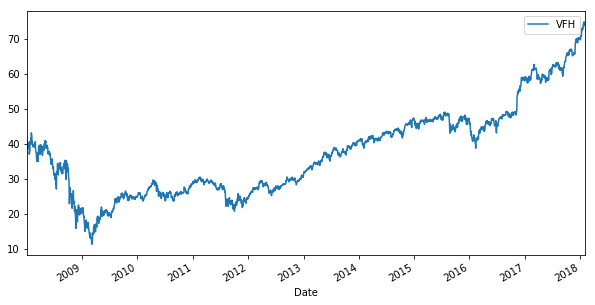

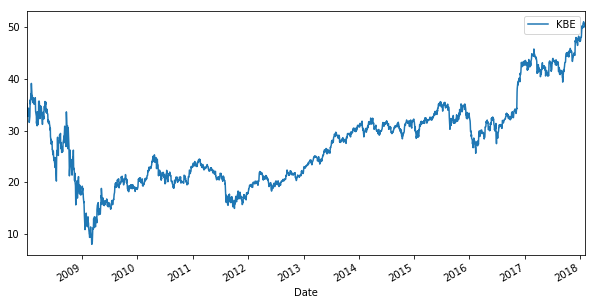

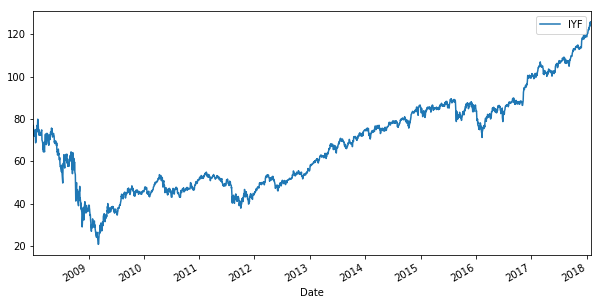

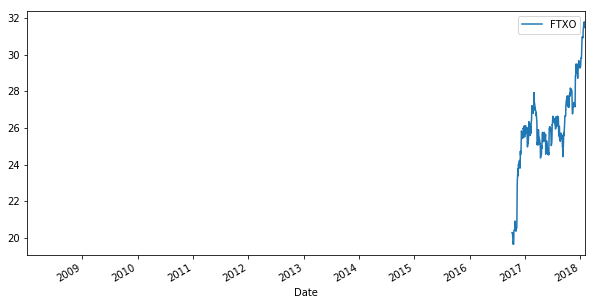

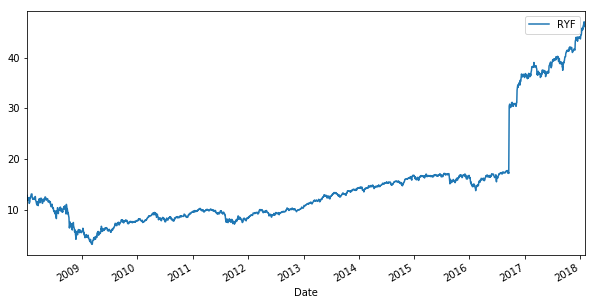

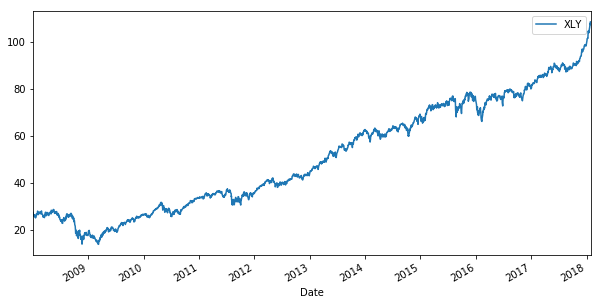

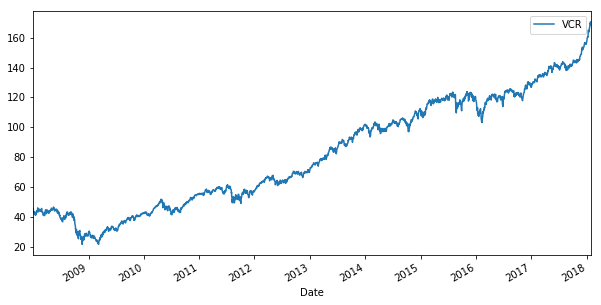

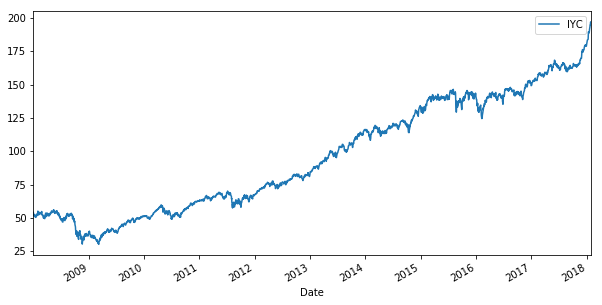

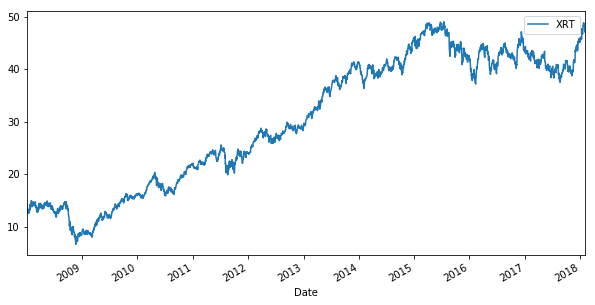

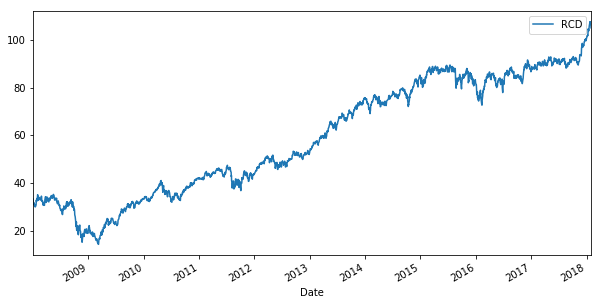

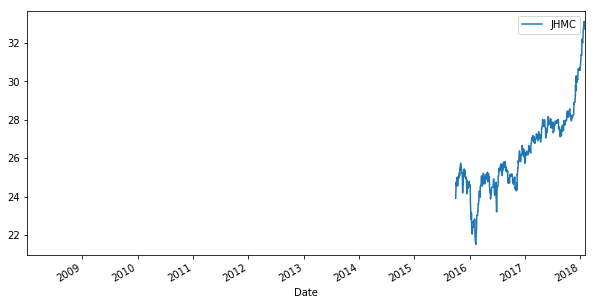

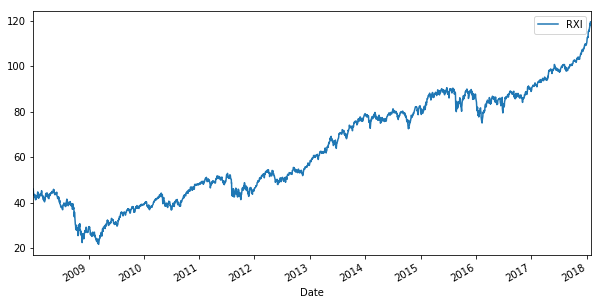

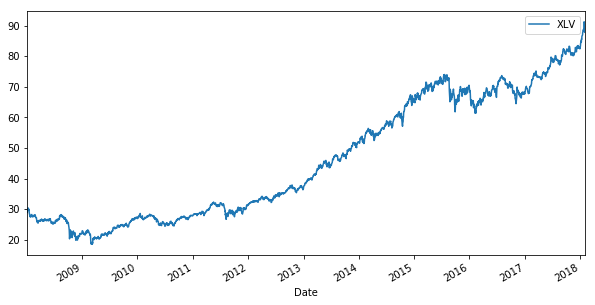

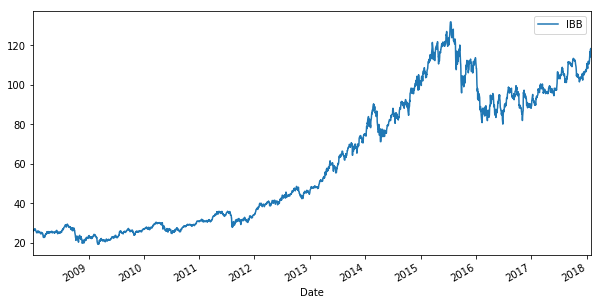

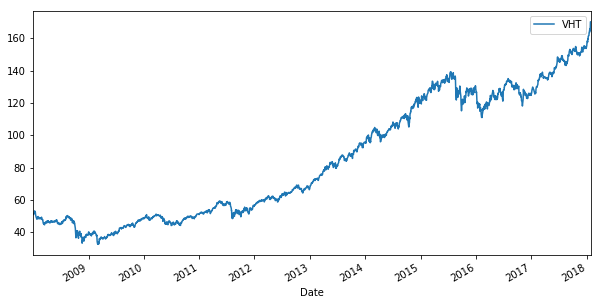

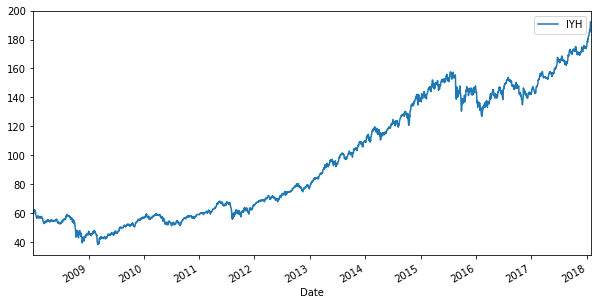

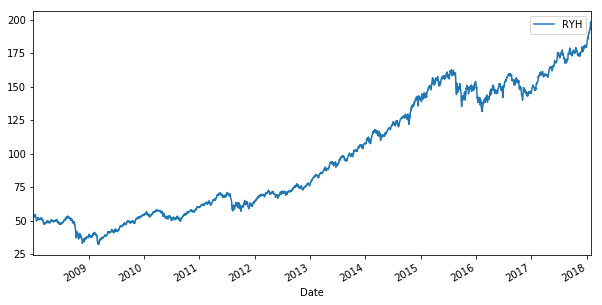

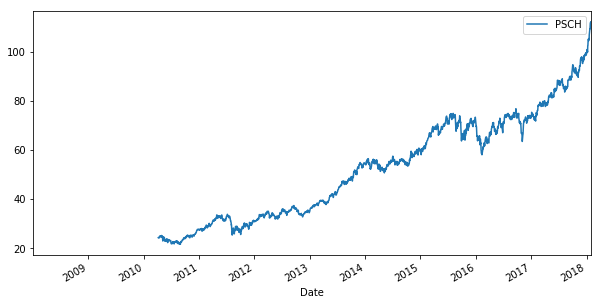

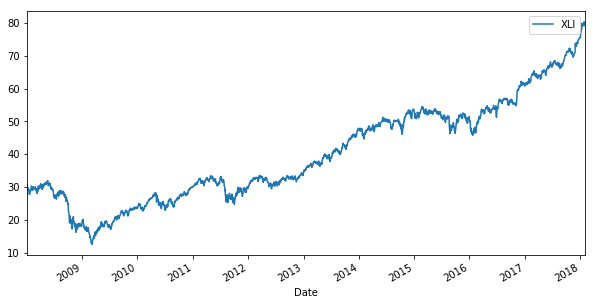

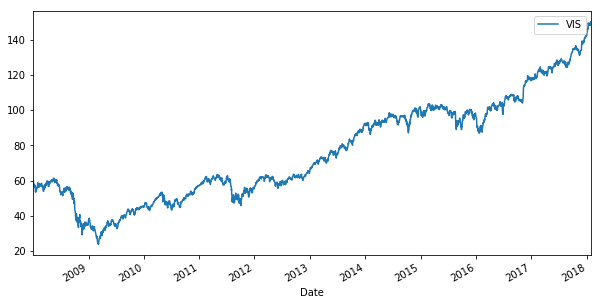

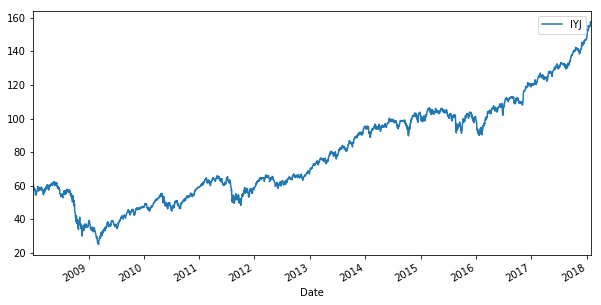

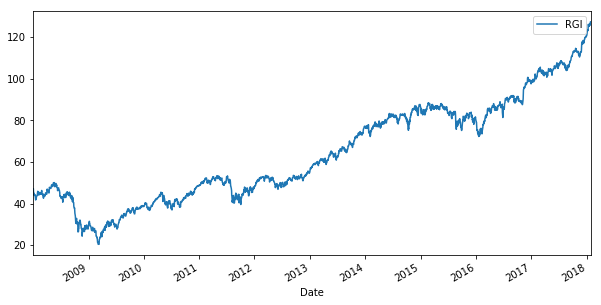

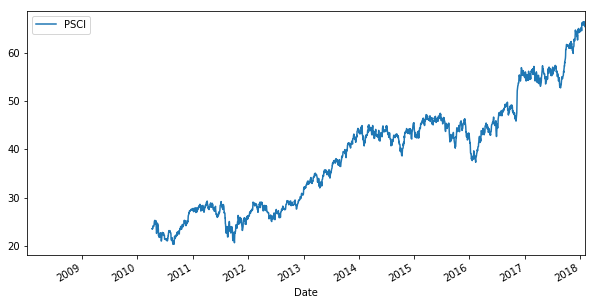

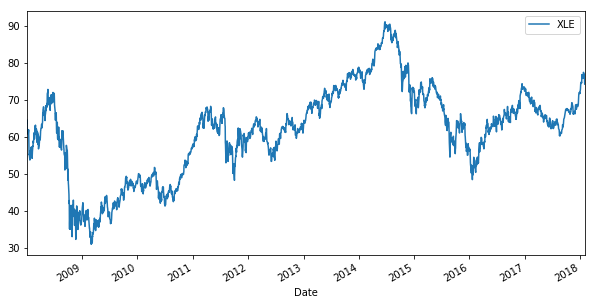

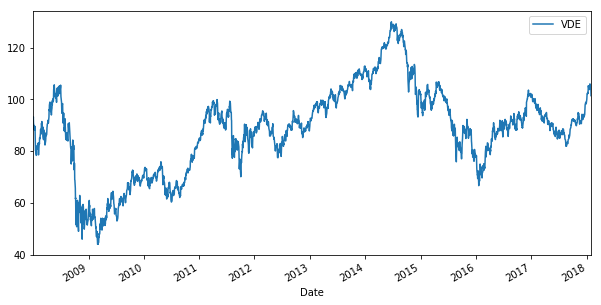

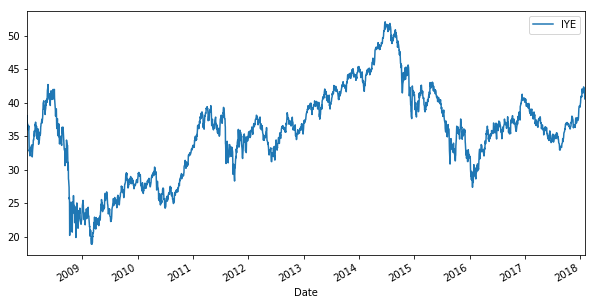

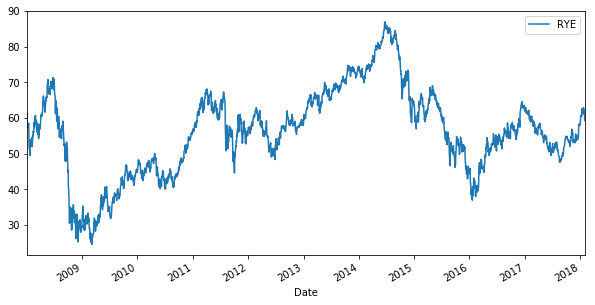

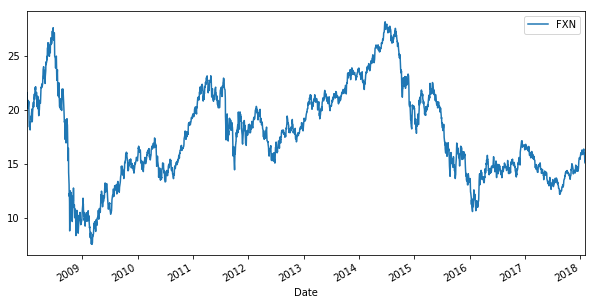

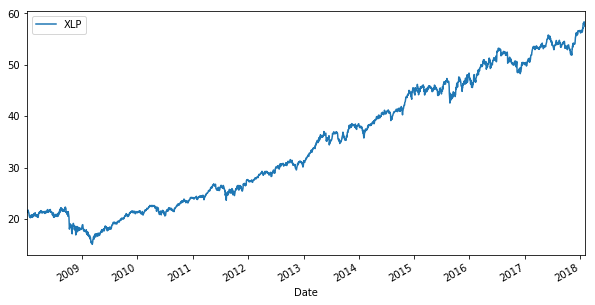

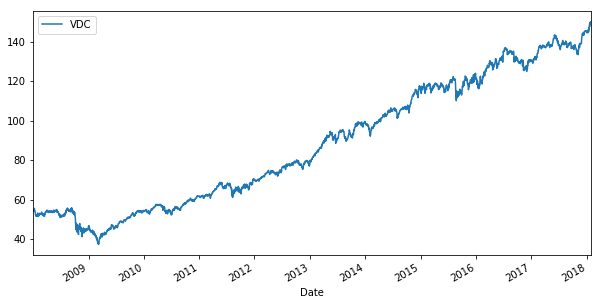

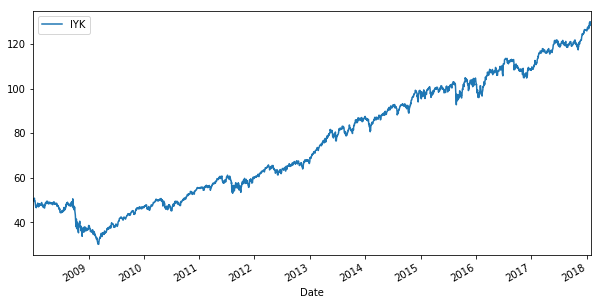

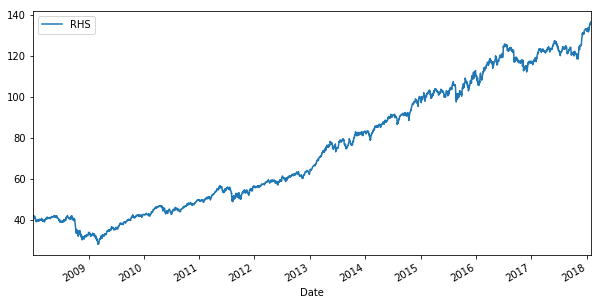

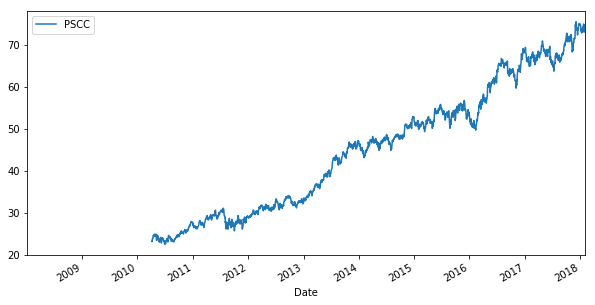

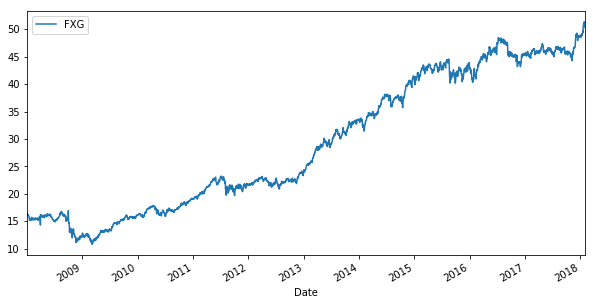

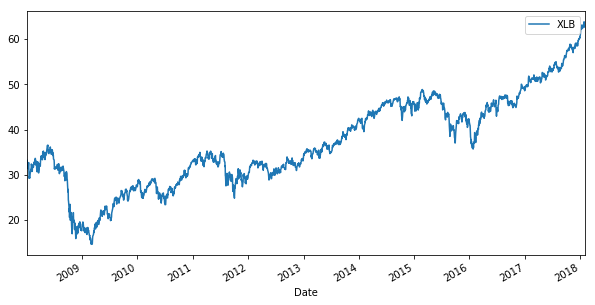

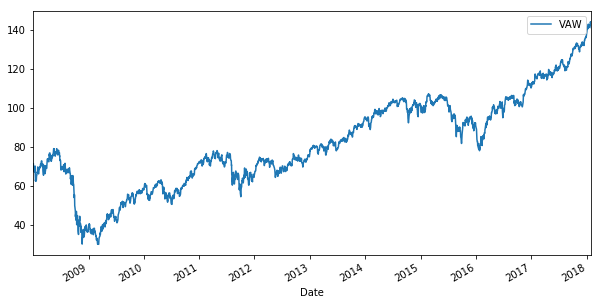

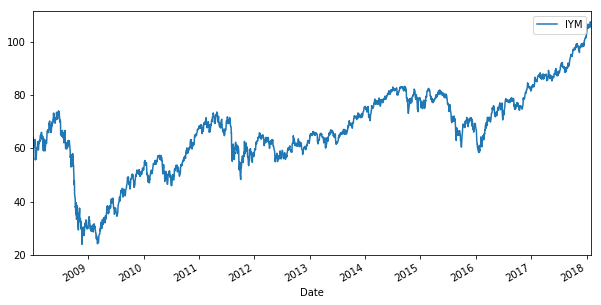

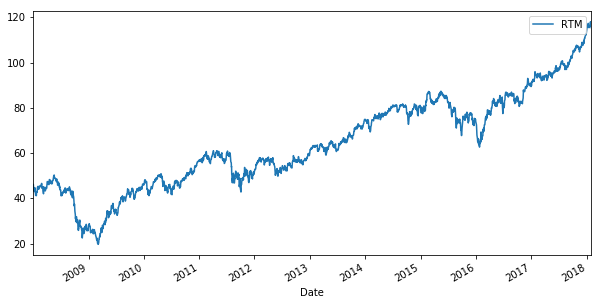

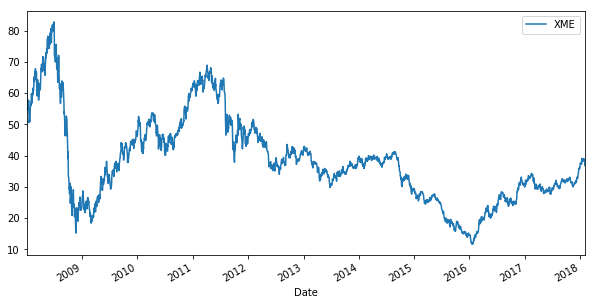

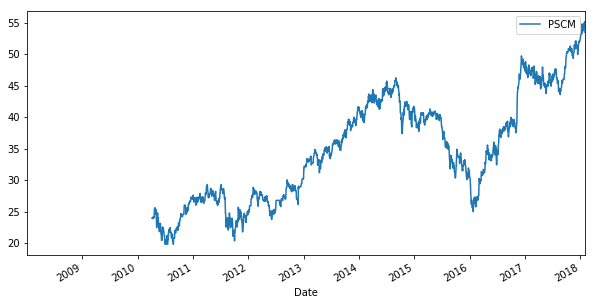

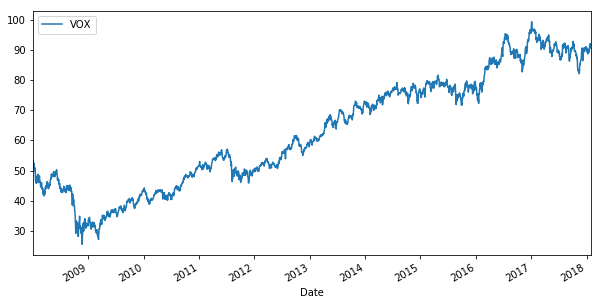

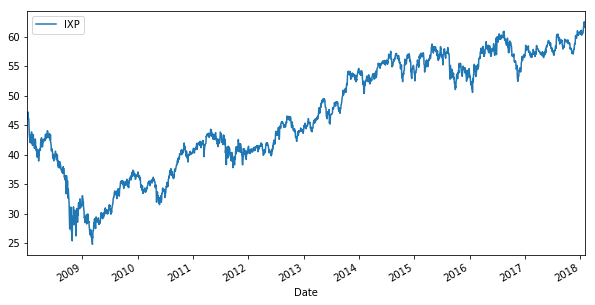

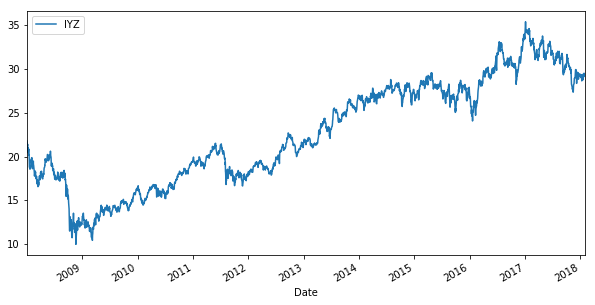

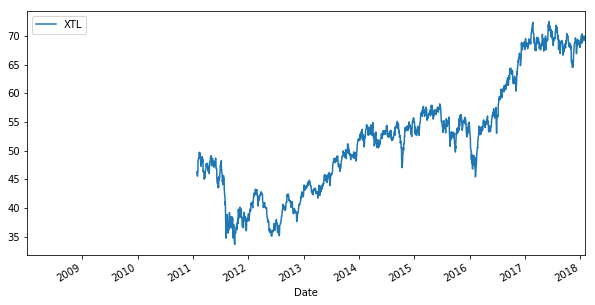

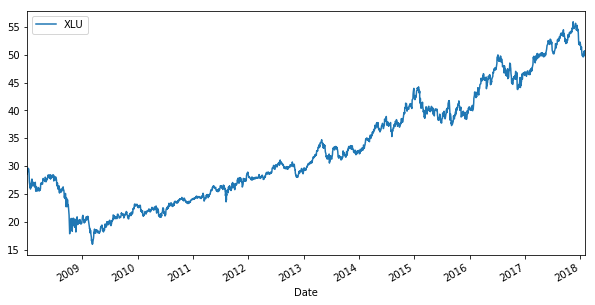

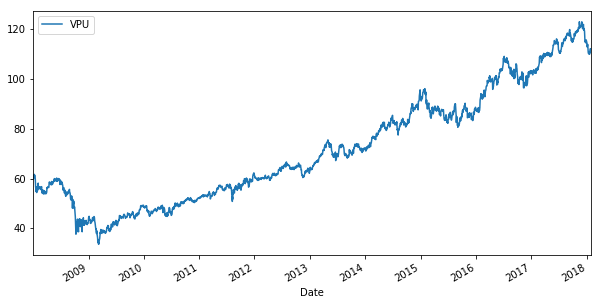

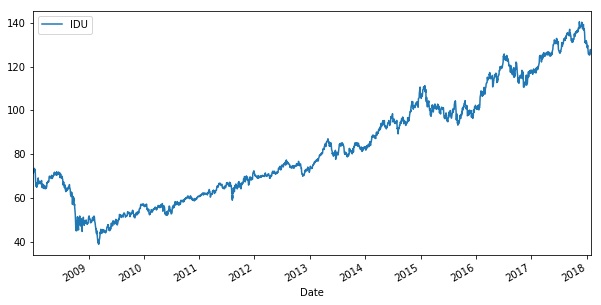

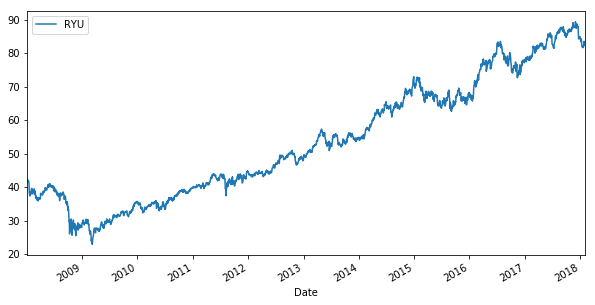

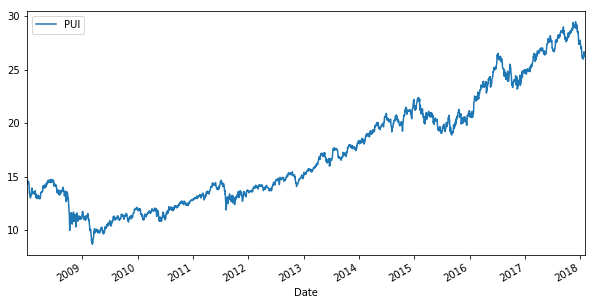

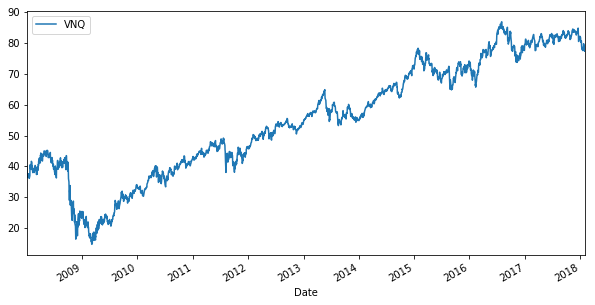

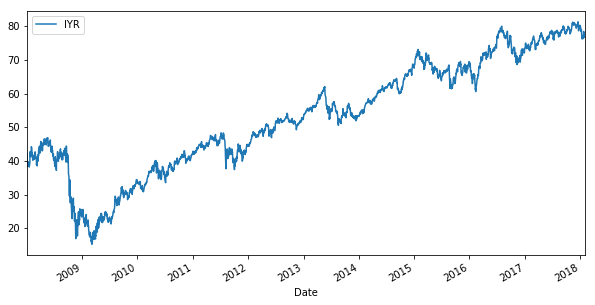

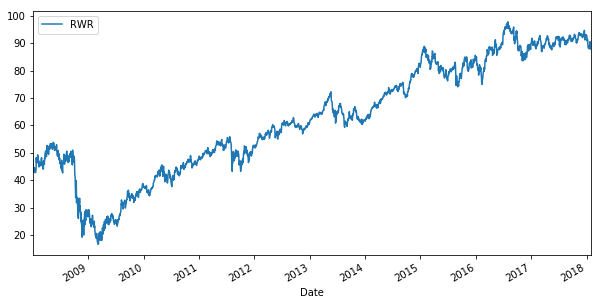

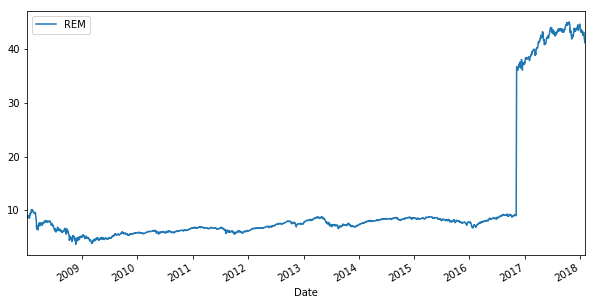

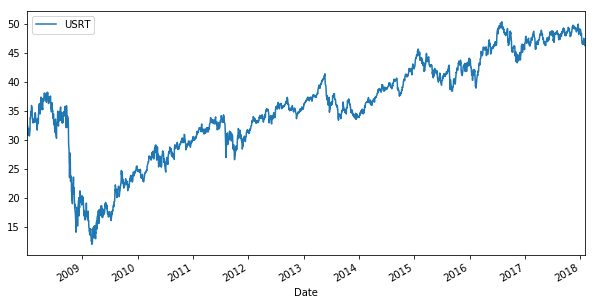

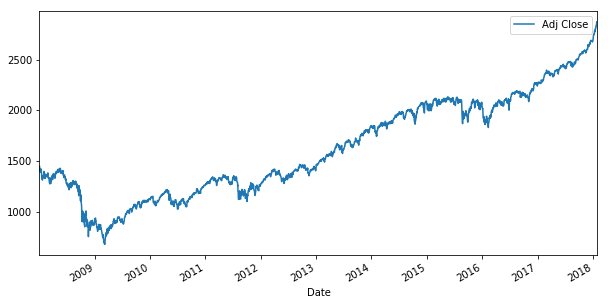

In [22]:
for i in ETFs_GSPC.columns:

    ETFs_GSPC[[i]].plot(figsize=(10,5))

    plt.show()


In [27]:

j = 0
for i in X_log.columns:
    etf = X_log[[i]].dropna(axis=0,how = 'any')
    pvalue = ADF(etf.values.flatten())[1]
    if pvalue < 0.01:
        print("original %s is stationary, cause pvalues is %s less than 0.01" % (i, pvalue))
    else:
        etf = etf.diff(1).dropna() 
        pvalue = ADF(etf.values.flatten())[1]
        if pvalue < 0.01:
            j+=1
            print("%s is stationary in first difference , cause pvalues is %s less than 0.01" % (i, pvalue))
        else:
            print("%s is not stationary in first difference, and the p-value is %s" %(i,pvalue))


print('\n')            
print("total number of assests is %s"%(X_log.shape[1]))
print('\n')
print ("total number of Integration of order 1 is %s"%(j))

XLK is stationary in first difference , cause pvalues is 2.45805390714e-19 less than 0.01
VGT is stationary in first difference , cause pvalues is 0.0 less than 0.01
IYW is stationary in first difference , cause pvalues is 0.0 less than 0.01
RYT is stationary in first difference , cause pvalues is 0.0 less than 0.01
IGM is stationary in first difference , cause pvalues is 4.62919880425e-19 less than 0.01
XNTK is stationary in first difference , cause pvalues is 0.0 less than 0.01
PNQI is stationary in first difference , cause pvalues is 1.60648580539e-14 less than 0.01
XLF is stationary in first difference , cause pvalues is 5.19918764554e-15 less than 0.01
VFH is stationary in first difference , cause pvalues is 9.63567160791e-16 less than 0.01
KBE is stationary in first difference , cause pvalues is 1.09432757411e-15 less than 0.01
IYF is stationary in first difference , cause pvalues is 7.99573566324e-16 less than 0.01
FTXO is stationary in first difference , cause pvalues is 6.9891

import pandas_datareader as pdr <br\><br\>
pdr.get_data_yahoo('XLF').head()


In [45]:
X_log = X.apply(np.log)


X_log.drop(['FTXO','PNQI', 'JHMC','PSCH','PSCI','PSCC','PSCM','XTL','REM'], axis=1, inplace=True)

In [43]:
X_log.head()

,XLK,VGT,IYW,RYT,IGM,XNTK,XLF,VFH,KBE,IYF,...,IYZ,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,3.095521,3.975347,4.025671,3.811888,3.996524,3.327295,2.660675,3.729364,3.560091,4.342348,...,3.080837,3.352228,4.093476,4.268139,3.731396,2.662886,3.692938,3.742345,3.859364,3.554688
2008-01-03,3.097051,3.970250,4.021581,3.801223,3.993784,3.330093,2.654308,3.720584,3.556090,4.333643,...,3.074992,3.350801,4.095320,4.270991,3.735692,2.658260,3.661269,3.709421,3.829599,3.516673
2008-01-04,3.057279,3.926913,3.977681,3.759111,3.946561,3.282642,2.625508,3.692564,3.521546,4.305491,...,3.052323,3.358386,4.092669,4.270303,3.728909,2.658775,3.619822,3.677181,3.786506,3.477431
2008-01-07,3.048490,3.917620,3.968215,3.745034,3.938621,3.269459,2.628062,3.697189,3.530778,4.309081,...,3.063198,3.378952,4.110630,4.287935,3.741446,2.678153,3.629085,3.686476,3.793198,3.479637
2008-01-08,3.021648,3.886439,3.937665,3.723206,3.909388,3.247390,2.590952,3.659372,3.487535,4.274322,...,3.026960,3.379183,4.110062,4.286582,3.741446,2.671058,3.593850,3.649441,3.760082,3.449441


In [34]:
GSPC_log = np.log(GSPC)
GSPC_log.head()

,Adj Close
Date,
2008-01-02,7.277358
2008-01-03,7.277358
2008-01-04,7.252500
2008-01-07,7.255718
2008-01-08,7.237196


In [47]:
X_constant = sm.add_constant(X_log)

sm_ols_results = sm.OLS(GSPC_log, X_constant).fit()

print(sm_ols_results.params)

print(sm_ols_results.summary())    

const    3.433579
XLK      0.106634
VGT     -0.340280
IYW      0.362721
RYT     -0.009364
IGM      0.022269
XNTK    -0.008896
XLF     -0.022285
VFH     -0.004444
KBE     -0.029224
IYF      0.274822
RYF      0.001034
XLY      0.035369
VCR     -0.189834
IYC      0.241357
XRT      0.002168
RCD      0.002166
RXI      0.033269
XLV     -0.061916
IBB     -0.019462
VHT      0.042490
IYH      0.197285
RYH     -0.032080
XLI     -0.023921
VIS     -0.085897
IYJ      0.284054
RGI      0.010213
XLE      0.166936
VDE     -0.237213
IYE      0.202452
RYE     -0.035947
FXN      0.000538
XLP      0.051890
VDC     -0.125302
IYK      0.171849
RHS     -0.010149
FXG     -0.004639
XLB      0.089108
VAW     -0.231768
IYM      0.141798
RTM     -0.030942
XME      0.008895
VOX     -0.024273
IXP      0.006123
IYZ      0.048406
XLU      0.027183
VPU     -0.197656
IDU      0.313082
RYU     -0.085839
PUI     -0.038134
VNQ     -0.090887
IYR     -0.050991
RWR      0.048468
USRT     0.075355
dtype: float64
             

In [48]:
ADF(sm_ols_results.resid.values.flatten())

(-10.293421444338202,
 3.5214206461010167e-18,
 21L,
 2517L,
 {'1%': -3.4329507078222634,
  '10%': -2.5673816472034661,
  '5%': -2.8626889823128554},
 -25711.477071803092)

In [99]:
X_test1 = X_log[['XLK','XLF','XLY','XLV','XLI','XLE','XLU']][:'2010-01-04']
GSPC_log_test1 = GSPC_log[:'2010-01-04']*1.1

In [100]:
X_test1_constant = sm.add_constant(X_test1)

sm_ols_results_test1 = sm.OLS(GSPC_log_test1, X_test1_constant).fit()

print(sm_ols_results_test1.params)

print(sm_ols_results_test1.summary())    

const    4.538839
XLK      0.157061
XLF      0.200225
XLY      0.040738
XLV      0.189016
XLI      0.167620
XLE      0.172815
XLU      0.111263
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.028e+04
Date:                Thu, 10 May 2018   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                 1871.0
No. Observations:                 506   AIC:                            -3726.
Df Residuals:                     498   BIC:                            -3692.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

In [101]:
ADF(sm_ols_results_test1.resid.values.flatten())

(-2.7089135743157562,
 0.072508491499843869,
 17L,
 488L,
 {'1%': -3.4438213751870337,
  '10%': -2.5699342544006987,
  '5%': -2.8674808695964642},
 -4166.9424533933452)

In [102]:
y_fitted = sm_ols_results_test1.fittedvalues

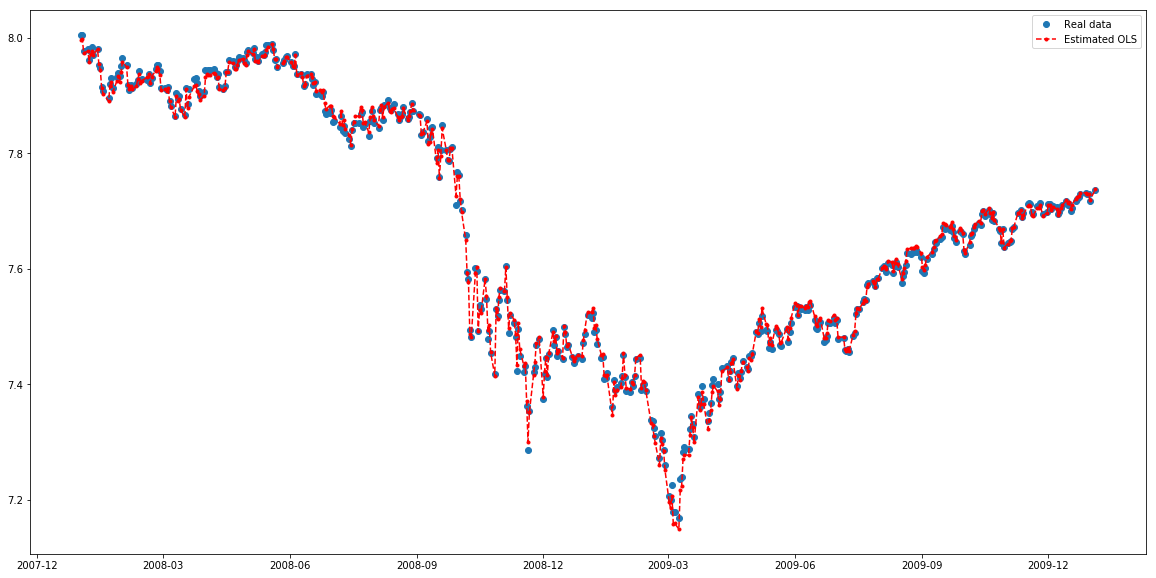

In [107]:
plt.figure(figsize=(20,10))
plt.plot(X_test1_constant.index,GSPC_log_test1, 'o', label='Real data' )
plt.plot(X_test1_constant.index, y_fitted, 'r--.',label='Estimated OLS')
plt.legend(loc='upper right')
plt.show()

In [114]:
LR_test1 = LinearRegression()
LR_test1.fit(X_test1,GSPC_log_test1) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
X_test1_validate = X_log[['XLK','XLF','XLY','XLV','XLI','XLE','XLU']]['2010-01-04': ]
GSPC_log_test1_validate = GSPC_log['2010-01-04': ]*1.1

In [127]:
GSPC_log_test1_validate_estimated = LR_test1.predict(X_test1_validate)

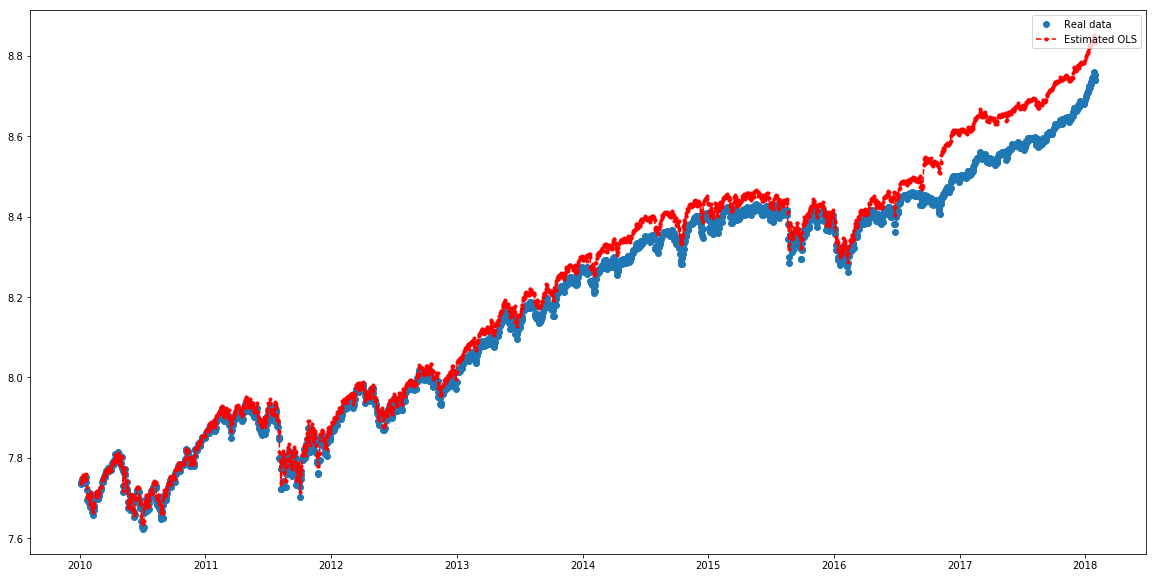

In [129]:
plt.figure(figsize=(20,10))
plt.plot(GSPC_log_test1_validate.index,GSPC_log_test1_validate, 'o', label='Real data' )
plt.plot(GSPC_log_test1_validate.index, GSPC_log_test1_validate_estimated, 'r--.',label='Estimated OLS')
plt.legend(loc='upper right')
plt.show()